## Import Libraries

In [1]:
from config import * 
config_chapter1()


from plots.chapter1 import *

Installing torchviz...
Creating folders...
Finished!


In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression

import torch 
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot

# A Simple Regression Problem

## Data Generation

### Sythetic Data Generation

In [3]:
true_b = 1
true_w = 2
N = 100

# Data Generation
np.random.seed(42)
x = np.random.rand(N, 1)
epsilon = (.1 * np.random.randn(N, 1))
y = true_b + true_w * x + epsilon

### Cell 1.1

In [4]:
# Shufle the indices 
idx = np.arange(N)
np.random.shuffle(idx)

# Uses first 80 random idices for train
train_idx = idx[:int(N*.8)]
# Use the remaing indices for validation
val_idx = idx[int(N*.8):]

# Generate train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

(<Figure size 864x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdb33ccf2d0>,
       dtype=object))

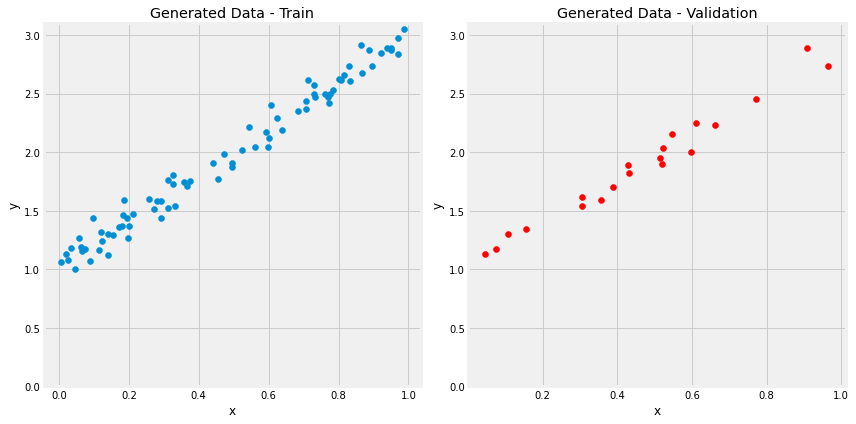

In [5]:
figure1(x_train, y_train, x_val, y_val)

# Gradient Descent

## Step 0: Random Initialization

In [6]:
# Step 0 - Initializes parameters 'b' and 'w' randomly
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

print(b, w)

[0.49671415] [-0.1382643]


## Step 1: Compute Models Prediction

In [7]:
# Step 1 - Computes our model's predicted output - forward pass
yhat = b + w * x_train

## Step 2: Compute the Loss

In [8]:
# Step 2 - Computing the Loss
# We are using all the data points, so this is BATCH gradient
# descent. How wrong is our model? That's the error!
error = (yhat - y_train)

# It is a regression, so it computes mean squared error (MSE)
loss = (error ** 2).mean()

print(loss)

2.7421577700550976


## Step 3: Compute the Gradients

In [9]:
# Step 3 - Compute gradients for both 'b' and 'w' parameters
b_grad = 2 * error.mean()
w_grad = 2 * (x_train * error).mean()
print(b_grad, w_grad)

-3.044811379650508 -1.8337537171510832


## Step 4: Update the Parameters

In [10]:
# Sets learning rate - this is "eta" ~ "n" like Greek letter
lr = 0.1
print(b, w)

# Step 4 - Updates the parameters using gradients and 
# the learning rate 
b = b - (lr * b_grad) 
w = w - (lr * w_grad)

print(b, w)

[0.49671415] [-0.1382643]
[0.80119529] [0.04511107]


## Step 5: Rinse and Repeat!

In [11]:
# Go back to the step 1 and run again. 
# Then, observe how parameters b and w change

# Linear Regression in Numpy

### Cell 1.2

In [12]:
# Step 0: Initializes parameters "b" and "w" randomly
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

print(b, w)

# Sets learning rate - this is "eta" ~ the "n" like Greek letter
lr = 0.1
# Define number of epochs 
n_epochs = 1000

for epoch in range(n_epochs):
    # Step 1 - Compute model's predicted output - forward pass
    y_hat = b + w * x_train

    # Step 2 - Computes the Loss
    # We are using all data points, so this BATCH gradient
    # descent. How wrong is our model? That's the error!
    error = (y_hat - y_train)
    # It is a regression, so it computs Mean Squared Error (MSE)
    loss = (error ** 2).mean()

    # Step 3 - Computes gradients for both "b" and "w" parameters
    b_grad = 2 * error.mean()
    w_grad = 2 * (x_train * error).mean()

    # Step 4 - Updates parameters using gradients and 
    # the learning rate
    b = b - lr * b_grad
    w = w - lr * w_grad

print(b, w)


[0.49671415] [-0.1382643]
[1.02354094] [1.96896411]


In [13]:
# Sanity Check: do we get the same results as our
# gradient descent?
linr = LinearRegression()
linr.fit(x_train, y_train)
print(linr.intercept_, linr.coef_[0])

[1.02354075] [1.96896447]


(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdb313a9bd0>)

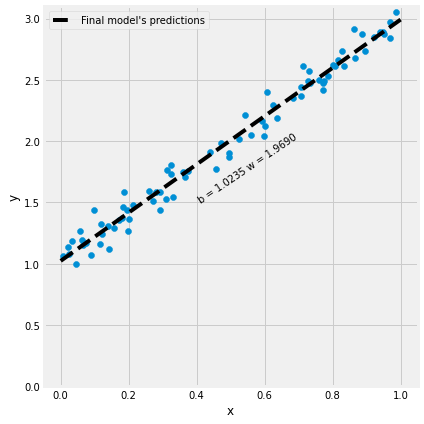

In [14]:
figure3(x_train, y_train)

# Linear Regression with PyTorch

## Tensor

In [15]:
scaler = torch.tensor(3.14159)
vector = torch.tensor([1, 2, 3])
matrix = torch.ones((2, 3), dtype=torch.float)
tensor = torch.randn((2, 3, 4), dtype=torch.float)

print(scaler)
print(vector)
print(matrix)
print(tensor)

tensor(3.1416)
tensor([1, 2, 3])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[[ 0.7616,  1.9918, -0.2603, -0.6990],
         [-0.3470, -0.8214,  0.2960,  1.0743],
         [ 0.2314, -2.0960,  1.0029,  1.4693]],

        [[ 0.7865,  1.0681, -1.3537,  1.3392],
         [ 0.5839,  0.0175,  0.9535, -0.3848],
         [-1.1996, -0.0360, -0.1364,  0.6733]]])


In [16]:
print(tensor.size(), tensor.shape)

torch.Size([2, 3, 4]) torch.Size([2, 3, 4])


In [17]:
print(scaler.size(), scaler.shape)

torch.Size([]) torch.Size([])


In [18]:
# We get a tensor with a different shape but it still is
# the SAME tensor 
same_matrix = matrix.view(1, 6)
# If we change one of its elements ...... 
same_matrix[0, 1] = 2.
# It changes both variables: matrix and same_matrix
print(matrix)
print(same_matrix)

tensor([[1., 2., 1.],
        [1., 1., 1.]])
tensor([[1., 2., 1., 1., 1., 1.]])


In [19]:
# We can use "new_tensor" method to REALLY copy it into a new one
different_matrix = matrix.new_tensor(matrix.view(1, 6))
# Now if we change one if its elements .......
different_matrix[0, 1] = 3.
# The original tensor (matrix) is left untoched!
# But we get a "warning" from PyTorch telling us
# to use "clone()" instead!
print(matrix)
print(different_matrix)

tensor([[1., 2., 1.],
        [1., 1., 1.]])
tensor([[1., 3., 1., 1., 1., 1.]])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  


In [20]:
# Let,s follow PyTorch's suggestion and use "clone" method
another_matrix = matrix.view(1, 6).clone().detach()
# Again, if we change one of its elements ......
another_matrix[0, 1] = 4.
# The original tensor (matrix) is left untouched!
print(matrix)
print(another_matrix)

tensor([[1., 2., 1.],
        [1., 1., 1.]])
tensor([[1., 4., 1., 1., 1., 1.]])


## Loading Data, Devices and Cuda

In [21]:
x_train_tensor = torch.as_tensor(x_train)
x_train.dtype, x_train_tensor.dtype

(dtype('float64'), torch.float64)

In [22]:
float_tensor = x_train_tensor.float()
float_tensor.dtype

torch.float32

In [23]:
dummy_array = np.array([1, 2, 3])
dummy_tensor = torch.as_tensor(dummy_array)
# Modifies the numpy array
dummy_array[1] = 0
#Tensor gets modified too....
dummy_tensor

tensor([1, 0, 3])

In [24]:
dummy_tensor.numpy()

array([1, 0, 3])

### Defining Your Device

In [25]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [26]:
n_cudas = torch.cuda.device_count()
for i in range(n_cudas):
  print(torch.cuda.get_device_name(i))

Tesla K80


In [27]:
gpu_tensor = torch.as_tensor(x_train).to(device)
gpu_tensor[0]

tensor([0.7713], device='cuda:0', dtype=torch.float64)

### Cell 1.3

In [28]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Our data was in Numpy arrays, but we need to transform them
# into PyTorch's Tensors and then we send them to the
# chosen device
x_train_tensor = torch.as_tensor(x_train).float().to(device)
y_train_tensor = torch.as_tensor(y_train).float().to(device)

In [29]:
# Here we can see the difference - notice that .type() is more
# useful since it also tells us WHERE the tensor is (device)
print(type(x_train), type(x_train_tensor), x_train_tensor.type())

<class 'numpy.ndarray'> <class 'torch.Tensor'> torch.cuda.FloatTensor


In [30]:
back_to_numpy = x_train_tensor.numpy()

TypeError: ignored

In [31]:
back_to_numpy = x_train_tensor.cpu().numpy()

## Creating Parameters

In [32]:
# FIRST
# Initializes parameters "b" and "w" randomly, ALMOST as we
# did in Numpy since we want to apply gradient descent on
# these parameters we need to set REQUIRES_GRAD = TRUE 
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float)
w = torch.randn(1, requires_grad=True, dtype=torch.float)
print(b, w)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)


In [33]:
# SECOND 
# But what if we want to run it on a GPU? we could just
# send them to device, right?
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)
w = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)
print(b, w)
# Sorry, but NO! The to(device) "shadows" the gradient .......

tensor([0.3367], device='cuda:0', grad_fn=<ToCopyBackward0>) tensor([0.1288], device='cuda:0', grad_fn=<ToCopyBackward0>)


In [34]:
# THIRD
# We can either create regular tensors and send them to
# the device (as we did with out data)
torch.manual_seed(42)
b = torch.randn(1, dtype=torch.float).to(device)
w = torch.randn(1, dtype=torch.float).to(device)
# and THEN sent them as requiring gradients
b.requires_grad_()
w.requires_grad_()
print(b, w)

tensor([0.3367], device='cuda:0', requires_grad=True) tensor([0.1288], device='cuda:0', requires_grad=True)


### Cell 1.4

In [35]:
# Final 
# We can specify the device at the moment of creation
# RECOMMENDED!

# Step 0 - Initialize parameters "b" and "w" randomly
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(b, w)

tensor([0.1940], device='cuda:0', requires_grad=True) tensor([0.1391], device='cuda:0', requires_grad=True)


# Autograd

## backward

### Cell 1.5

In [36]:
# Step 1 - Computes our model's predicted output - forward pass
yhat = b + w * x_train_tensor

# Step 2 - Compute the loss
# We are using ALL data points, so this is a BATCH gradient descent
# How wrong is our model? That's the error!
error = (yhat - y_train_tensor)
# It is a regression, so it computes Mean Squared Error (MSE)
loss = (error ** 2).mean()

# Step 3 - Compute gradients for both "b" and "w" parameters
# No more manual computation of gradients!
# b_grad = 2 * error.mean()
# w_grad = 2 * (x_tensor * error).mean() 
loss.backward()

In [37]:
print(error.requires_grad, yhat.requires_grad, \
      b.requires_grad, w.requires_grad)

True True True True


In [38]:
print(y_train_tensor.requires_grad, x_train_tensor.requires_grad)

False False


## grad

In [39]:
print(b.grad, w.grad)

tensor([-3.3881], device='cuda:0') tensor([-1.9439], device='cuda:0')


In [40]:
# Just run above two cells one more time. Gradient will add.

## Zero_

In [41]:
# This code will be placed **after** Step 4
# (Updating the parameters)
b.grad.zero_(), w.grad.zero_()

(tensor([0.], device='cuda:0'), tensor([0.], device='cuda:0'))

## Updating the Parameters

### Cell 1.6

In [42]:
# Sets learning rate - this is "eta" ~ the "n"-like Greek Letter
lr = 0.1

# Step 0 - Initializes parameters "b" and "w" randomly
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

# Defines number of epochs 
n_epochs = 1000

for epoch in range(n_epochs):
    # Step 1 - Compute model' predicted output - forward pass
    yhat = b + w * x_train_tensor


    # Step 2 - Compute the loss
    # We are using ALL data points, so this is a BATCH gradient
    # descent. How wrong is our model? That's the error!
    error = (yhat - y_train_tensor)
    # It is a regression, so it computes Mean Squared Error (MSE)
    loss = (error ** 2).mean()


    # Step 3 - Compute gradients for both "b" and "w" parameters
    # No more manual computation for gradients!
    # b_grad = 2 * error.mean()
    # w_grad = 2 * (x_train_tensor * error).mean()
    # We just tell PyTorch to work its way BACKWARDS
    # from the specified loss
    loss.backward()


    # Step 4 - Updates parameters using gradients and
    # the learning rate. But not so fast .......
    # FIRST ATTEMPT. Just using the same code as before
    # AttributeError: 'NoneType' object has no attribute 'zero_'
    # b = b - lr * b.grad
    # w = w - lr * w.grad
    # print(b)

    # SECOND ATTEMPT - using in-place Python assignment
    # RuntTimeError: a leaf Variable that requires grad
    # has been in an in-place operation.
    # b -= lr * b.grad
    # w -= lr * w.grad


    # THIRD ATTEMPT - NO_GRAD for the win!
    # We need to use NO_GRAD to keep the update out of
    # the gradient computation. Why is that? It boils
    # down the DYNAMIC GRAPH that PyTorch uses ......
    with torch.no_grad():
      b -= lr * b.grad
      w -= lr * w.grad


    # PyTorch is "clingy" to its computed gradients, we
    # need to tell it to let it go 
    b.grad.zero_()
    w.grad.zero_()

print(b, w)

tensor([1.0235], device='cuda:0', requires_grad=True) tensor([1.9690], device='cuda:0', requires_grad=True)


## No Grad

In [43]:
# This is what we have used in third attempt

# Dynamic Computation Graph

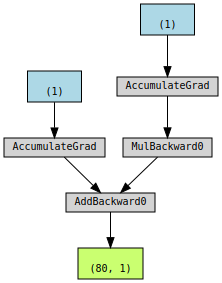

In [44]:
# Step 0 - Initializes Parameters "b" and "w" randomly
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

# Step 1 - Compute's our model's predicted output - forward pass
yhat = b + w * x_train_tensor

# Step 2 - Compute the loss 
# We are using ALL data points, so this a BATCH gradient
# descent. How wrong is our model? That's the error!
error = (yhat - y_train_tensor)
# It is a regression, so it computes Mean Squared Error (MSE)
loss = (error ** 2).mean()

# We can try plotting the graph for any python variable:
# yhat, error, loss ...
make_dot(yhat)

## Non Linear Graph

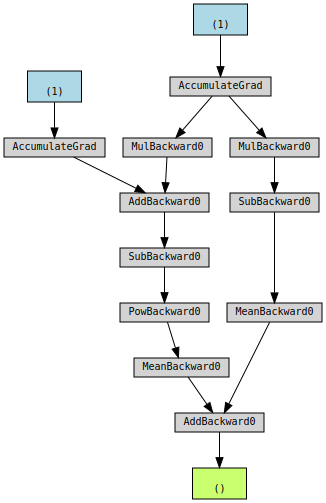

In [45]:
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

yhat = b + w * x_train_tensor
error = (yhat - y_train_tensor)
loss = (error ** 2).mean()

# this make no sense!!
if loss > 0:
  yhat2 = w * x_train_tensor 
  error2 = yhat2 - x_train_tensor 

# neither does this :-)
loss += error2.mean()

make_dot(loss)

# Optimizer

## step / zero_grad

In [46]:
# Defines a SGD optimizer to update the parameters
optimizer = optim.SGD([b, w], lr=lr)

### Cell 1.7

In [47]:
# Set learning rate - this is "eta" ~ the "n" like letter in latin
lr = 0.1

# Step 0 - Initialize parameters "b" and "w" randomly
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

# Defines a SGD optimizers to update the parameters
optimizer = optim.SGD([b, w], lr=lr)

# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Step 1 - Compute model's predicted output - forward pass
    yhat = b + w * x_train_tensor

    
    # Step 2 - Compute the loss
    # We are using ALL data points, so this is BATCH gradient
    # descent. How wrong is our model? That's the error!
    error = (yhat - y_train_tensor)
    # It is a regression, so it computes Mean Squared Error (MSE)
    loss = (error ** 2).mean()

    # Step 3 - Compute gradients for both "b" and "w" parameters
    loss.backward()

    # Step 4 - Updates parameters using gradients and 
    # the learning rate. No more manual update!
    optimizer.step()

    optimizer.zero_grad()

print(b, w)

tensor([1.0235], device='cuda:0', requires_grad=True) tensor([1.9690], device='cuda:0', requires_grad=True)


# Loss

In [48]:
# Define a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')
loss_fn

MSELoss()

In [49]:
# This is a random example to illustrate the loss function
predictions = torch.tensor([0.5, 1.0])
labels = torch.tensor([2.0, 1.3])
loss_fn(predictions, labels)

tensor(1.1700)

### Cell 1.8

In [50]:
# Set learning rate - this is "eta" ~ the "n" like 
# Greek letter 

lr = 0.1

# Step 0 - Initializes parameters "b" and "w" randomly
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device) 
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)


# Define a SGD optimizer to update the parameters
optimizer = optim.SGD([b, w], lr=lr)

# Defines MSE Loss Function 
loss_fn = nn.MSELoss(reduction='mean')

# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Step 1 - Computes model's predicted output - forward pass
    yhat = b + w * x_train_tensor 


    # Step 2 - Computes the loss
    # No more manual loss!
    # error - (yhat - y_train_tensor)
    # loss = (error ** 2).mean()
    loss = loss_fn(yhat, y_train_tensor)

    # Step 3 - Computes gradient for both "b" and "w" parameters 
    loss.backward()

    # Step 4 - Updates the parameters using gradients and 
    # the learning rate
    optimizer.step()
    optimizer.zero_grad()


print(b, w)




tensor([1.0235], device='cuda:0', requires_grad=True) tensor([1.9690], device='cuda:0', requires_grad=True)


In [51]:
loss

tensor(0.0080, device='cuda:0', grad_fn=<MseLossBackward0>)

In [52]:
loss.cpu().numpy()

RuntimeError: ignored

In [53]:
loss.detach().cpu().numpy()

array(0.00804466, dtype=float32)

In [55]:
print(loss.item(), loss.tolist())

0.008044655434787273 0.008044655434787273


# Model

### Cell 1.9

In [66]:
class ManualLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # To makd "b" and "w" real parameters of the model,
        # we need to wrap them up with nn.Parameter
        self.b = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.w = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x):
        # Computes the outputs / predictions
        return self.b + self.w * x

## Parameters

In [67]:
torch.manual_seed(42)
# Creates a "dummy" instance of our ManualLinearRegression model
dummy = ManualLinearRegression()
list(dummy.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

## state_dict()

In [68]:
dummy.state_dict()

OrderedDict([('b', tensor([0.3367])), ('w', tensor([0.1288]))])

In [69]:
optimizer.state_dict()

{'param_groups': [{'dampening': 0,
   'lr': 0.1,
   'momentum': 0,
   'nesterov': False,
   'params': [0, 1],
   'weight_decay': 0}],
 'state': {}}

## device

In [70]:
torch.manual_seed(42)
# Create a "dummy" instance of our ManualLinearRegression model
# and sends it to the device
dummy = ManualLinearRegression().to(device) 

## Forward Pass

### Cell 1.10

In [71]:
# Sets learning rate - this is "eta" ~ the "n" like Greek letter
lr = 0.1

# Step 0 - Initializes parameters "b" and "w" randomly
torch.manual_seed(42)
# Now we can create a model and send it at once to the device 
model = ManualLinearRegression().to(device)


# Defines a SGD optimizer to update the parameters 
# (now retreived directly from the model)
optimizer = optim.SGD(model.parameters(), lr=lr)

# Define a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

# Define number of epochs
n_epochs = 1000


for epoch in range(n_epochs):
    model.train()

    # Step 1 - Computes model's predicted output - forward pass
    # No more manual prediction!
    yhat = model(x_train_tensor)

    # Step 2 - Computes the loss 
    loss = loss_fn(yhat, y_train_tensor) 

    # Step 3 - Computes gradients for both "b" and "w" parameters
    loss.backward()


    # Step 4 - Updates parameters using gradients and
    # the learning rate
    optimizer.step()
    optimizer.zero_grad()

# We can also inspect its parameters using its state_dict
print(model.state_dict())



OrderedDict([('b', tensor([1.0235], device='cuda:0')), ('w', tensor([1.9690], device='cuda:0'))])


## train

In [73]:
# Never forget to include model.train() in your loop

## Nested Models

In [74]:
linear = nn.Linear(1, 1)

In [75]:
linear.state_dict()

OrderedDict([('weight', tensor([[-0.2191]])), ('bias', tensor([0.2018]))])

### Cell 1.11

In [81]:
class MyLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # Instead of our custom parameters, we use a Linear Model
        # with single input and single output
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        # Now it only takes a call
        self.linear(x)

In [82]:
torch.manual_seed(42)
dummy = MyLinearRegression().to(device) 
list(dummy.parameters())

[Parameter containing:
 tensor([[0.7645]], device='cuda:0', requires_grad=True), Parameter containing:
 tensor([0.8300], device='cuda:0', requires_grad=True)]

In [83]:
dummy.state_dict()

OrderedDict([('linear.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear.bias', tensor([0.8300], device='cuda:0'))])

## Sequential Models

### Cell 1.12

In [84]:
torch.manual_seed(42)
# Alternatively, you can use a Sequential model
model = nn.Sequential(nn.Linear(1, 1)).to(device)


model.state_dict()

OrderedDict([('0.weight', tensor([[0.7645]], device='cuda:0')),
             ('0.bias', tensor([0.8300], device='cuda:0'))])

## Layers

In [86]:
torch.manual_seed(42)
# Building the model from the figure above
model = nn.Sequential(nn.Linear(3, 5), nn.Linear(5, 1)).to(device)

model.state_dict()

OrderedDict([('0.weight', tensor([[ 0.4414,  0.4792, -0.1353],
                      [ 0.5304, -0.1265,  0.1165],
                      [-0.2811,  0.3391,  0.5090],
                      [-0.4236,  0.5018,  0.1081],
                      [ 0.4266,  0.0782,  0.2784]], device='cuda:0')),
             ('0.bias',
              tensor([-0.0815,  0.4451,  0.0853, -0.2695,  0.1472], device='cuda:0')),
             ('1.weight',
              tensor([[-0.2060, -0.0524, -0.1816,  0.2967, -0.3530]], device='cuda:0')),
             ('1.bias', tensor([-0.2062], device='cuda:0'))])

In [87]:
torch.manual_seed(42)
# Building the model from the figure above
model = nn.Sequential()
model.add_module('layer 1', nn.Linear(3, 5))
model.add_module('layer 2', nn.Linear(5, 1))
model.to(device)

Sequential(
  (layer 1): Linear(in_features=3, out_features=5, bias=True)
  (layer 2): Linear(in_features=5, out_features=1, bias=True)
)

# Putting It All Together

## Date Preparation

### Data Preparation V0

In [89]:
%%writefile data_preparation/v0.py

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Our data is in Numpy arrays, but we need to transform them
# into PyTorch's Tensors. Then, we send them to
# Chosen device

x_train_tensor = torch.as_tensor(x_train).float().to(device)
y_train_tensor = torch.as_tensor(y_train).float().to(device)


Writing data_preparation/v0.py


In [90]:
%run -i data_preparation/v0.py

<Figure size 432x288 with 0 Axes>

## Model Configuration

### Model Configuration V0

In [91]:
%%writefile model_configuration/v0.py

# This is redundant now, but it won't be when we introduce
# Datasets ......
device = 'cuda' if torch.cuda.is_available() else 'cpu' 

# Sets learning rate - this is "eta" ~ the "n" -like Greek letter
lr = 0.1 

torch.manual_seed(42)
# Now we can create a model and send it once to a device 
model = nn.Sequential(nn.Linear(1, 1)).to(device)

# Defines a SGD optimizer to update the parameters
# (now retrieved directly from the model)
optimizer = optim.SGD(model.parameters(), lr=lr) 

# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

Writing model_configuration/v0.py


In [92]:
%run -i model_configuration/v0.py

## Model Training

### Model Training V0

In [93]:
%%writefile model_training/v0.py

# Define number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Set models to train mode
    model.train()

    # Step 1 - Compute model's predicted output - forward pass
    yhat = model(x_train_tensor)

    # Step 2 - Compute the loss
    loss = loss_fn(yhat, y_train_tensor)

    # Step 3 - Compute the gradients for both "b" and "w" parameters
    loss.backward()

    # Step 4 - Updates parameters using gradients and 
    # the learning rate
    optimizer.step()
    optimizer.zero_grad()

Writing model_training/v0.py


In [94]:
%run -i model_training/v0.py

In [95]:
print(model.state_dict())

OrderedDict([('0.weight', tensor([[1.9690]], device='cuda:0')), ('0.bias', tensor([1.0235], device='cuda:0'))])
